In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessionimport pandas as pd
import matplotlib.pyplot as plt
import collections
import sklearn
from sklearn.model_selection import learning_curve

from sklearn import svm

from sklearn import ensemble
#%matplotlib inline

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [15]:
df = pd.read_csv(r"/kaggle/input/bike-sharing-demand/train.csv")


In [21]:
df['date']=pd.to_datetime(df['datetime'])

In [26]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [31]:

df.set_index('datetime', inplace=True)


KeyError: "None of ['datetime'] are in the columns"

In [32]:
df.index

Index(['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
       '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
       '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
       '2011-01-01 09:00:00',
       ...
       '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
       '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
       '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
       '2012-12-19 23:00:00'],
      dtype='object', name='datetime', length=10886)

In [41]:
df.index = pd.to_datetime(df.index)
df['month'] = df.index.month
df['hours'] = df.index.hour
df['dayOfWeek'] = df.index.weekday



In [42]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hours,dayOfWeek
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5


In [43]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [44]:
class mean_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,h):
        a = self.df["hours"] == h
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

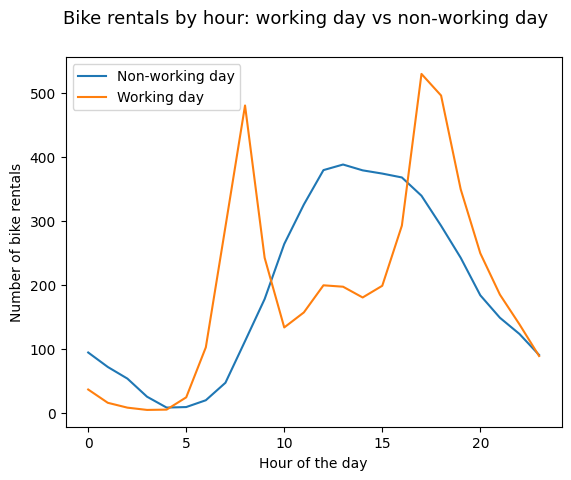

In [45]:
fig = plt.figure()
fig.suptitle('Bike rentals by hour: working day vs non-working day', fontsize=13)
plt.ylabel('Number of bike rentals')
plt.xlabel('Hour of the day')

moy0 = mean_30(df[df['workingday'] == 0])
moy0.view()

moy1 = mean_30(df[df['workingday'] == 1])
moy1.view()

plt.legend(['Non-working day', 'Working day'])
plt.show()


In [61]:
j =0

In [85]:
class std_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_std(self,j,h):
        y = self.df[self.df["dayOfWeek"]==j]["hours"] == h
        return self.df[self.df["dayOfWeek"]==j][y]["count"].mean()
    def err_hours(self,j,h):
        y = self.df[self.df["dayOfWeek"]==j]["hours"] == h
        return self.df[self.df["dayOfWeek"]==j][y]["count"].std()
    def transf_err(self,t):
        return self.mean_hours_std(j,t)
    def transf_err2(self,t):
        return self.err_hours(j,t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_std = pd.DataFrame()
        hour_std["A"] = k
        return hour_std["A"] 
    def view(self):
        errors=self.vector_day().apply(self.transf_err2)
        fig, ax = plt.subplots()
        self.vector_day().apply(self.transf_err).plot(yerr=errors, ax=ax,label=str(j))
        plt.legend('0',loc=2,prop={'size':9})

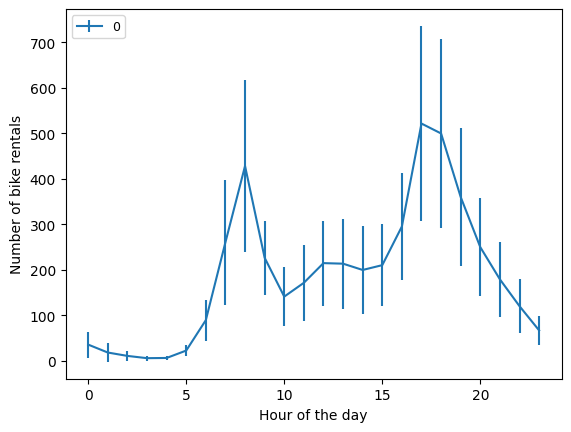

In [87]:
fig.suptitle('Standard deviation of bike rentals by hour', fontsize=13)

std0 = std_30(df)
std0.view()

plt.ylabel('Number of bike rentals')
plt.xlabel('Hour of the day')

plt.show()



In [88]:
class month_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,m):
        a = self.df["month"] == m
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,13):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

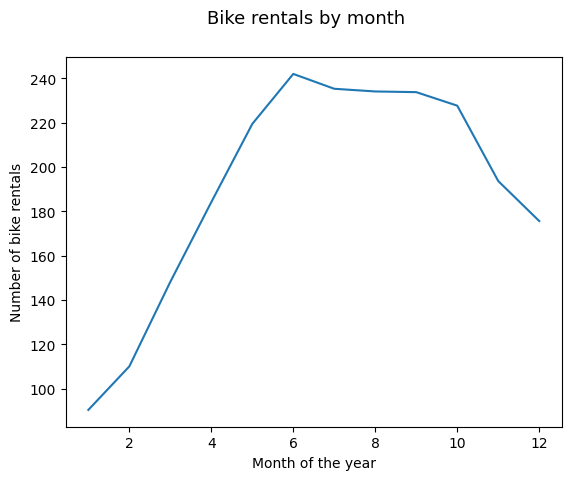

In [90]:
fig = plt.figure()
fig.suptitle('Bike rentals by month', fontsize=13)

moy0 = month_30(df)
moy0.view()

plt.ylabel('Number of bike rentals')
plt.xlabel('Month of the year')

plt.show()


In [91]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [94]:
a = {
    'Clear/Cloudy': df[df['weather'] == 1]['count'].mean(),
    'Fog': df[df['weather'] == 2]['count'].mean(),
    'Light Rain': df[df['weather'] == 3]['count'].mean()
}


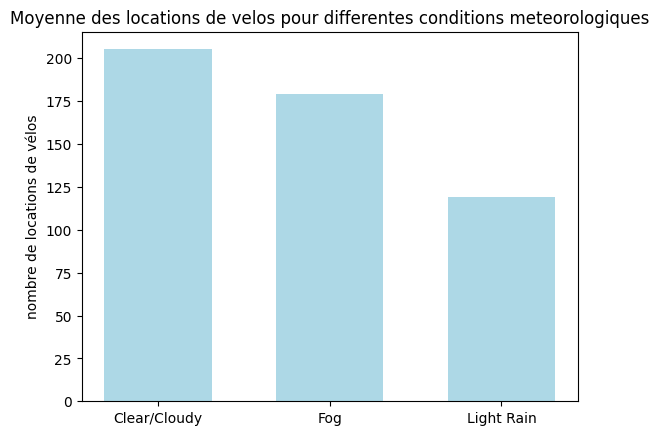

In [97]:
width = 1/1.6
plt.bar(range(len(a)), a.values(),width,color="lightblue",align='center')
plt.xticks(range(len(a)), a.keys())
plt.ylabel('nombre de locations de vélos')
plt.title('Moyenne des locations de velos pour differentes conditions meteorologiques')
plt.show()


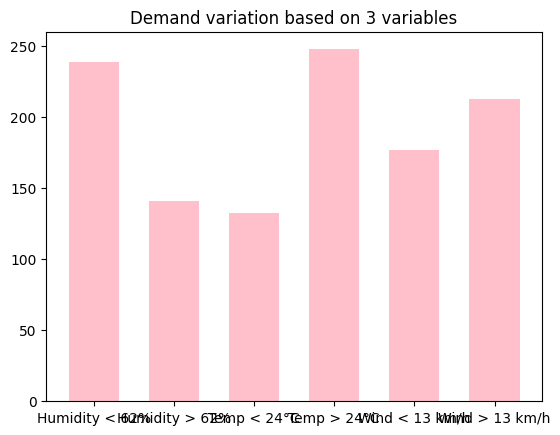

In [99]:
D = {
    'Wind > 13 km/h': df[df['windspeed'] > 13]['count'].mean(),
    'Wind < 13 km/h': df[df['windspeed'] < 13]['count'].mean(),
    'Temp < 24°C': df[df['atemp'] < 24]['count'].mean(),
    'Temp > 24°C': df[df['atemp'] > 24]['count'].mean(),
    'Humidity > 62%': df[df['humidity'] > 62]['count'].mean(),
    'Humidity < 62%': df[df['humidity'] < 62]['count'].mean()
}

od = collections.OrderedDict(sorted(D.items()))
width = 1/1.6

plt.figure()
plt.bar(range(len(od)), od.values(), width, color="pink", align='center')
plt.xticks(range(len(od)), od.keys())
plt.title('Demand variation based on 3 variables')
plt.show()


In [102]:
# Columns to drop (only if they exist)
columns_to_drop = ['workingday', 'season', 'atemp', 'holiday', 'registered', 'casual']
df1 = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Target variable
target = df1['count'].values

# Features for training
train = df1.drop('count', axis=1)

print("Train columns:", train.columns)
print("Target shape:", target.shape)


Train columns: Index(['weather', 'temp', 'humidity', 'windspeed', 'month', 'hours',
       'dayOfWeek'],
      dtype='object')
Target shape: (10886,)


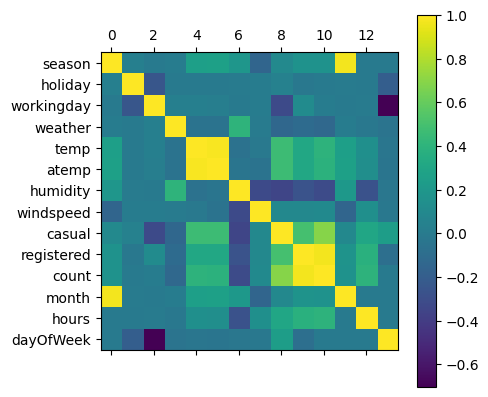

Train columns: Index(['weather', 'temp', 'humidity', 'windspeed', 'month', 'hours',
       'dayOfWeek'],
      dtype='object')
Target shape: (10886,)


In [104]:
import matplotlib.pyplot as plt

# 1️⃣ Correlation matrix (this works as is)
plt.matshow(df.corr())
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
plt.colorbar()
plt.show()

# 2️⃣ Drop columns that exist (remove 'datetime' since it's not in df)
columns_to_drop = ['workingday','season','atemp','holiday','registered','casual']
df1 = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# 3️⃣ Set target and training features
target = df1['count'].values
train = df1.drop('count', axis=1)

print("Train columns:", train.columns)
print("Target shape:", target.shape)



In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    train, target, test_size=0.33, random_state=42
)


In [127]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = sklearn.learning_curve.learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt


In [133]:
linreg=linear_model.LinearRegression()
linreg.fit(X_train,Y_train)
tableau=[['Paramètre', 'Coefficient']] #liste pour voir les valeurs des coefficients
col=list(train.columns.values)
for i in range(7):
    tableau.append([col[i],linreg.coef_[i]])

print ("Training Score Regression Linéare : ", str(linreg.score(X_train,Y_train)))
print ("Test Score Regression Linéare : " , str(linreg.score(X_test,Y_test)))
print ("Coefficients Regression Linéare :")
print (tableau)

Training Score Regression Linéare :  0.33714622910676406
Test Score Regression Linéare :  0.33352764224301534
Coefficients Regression Linéare :
[['Paramètre', 'Coefficient'], ['weather', -0.7690205222965789], ['temp', 6.757640439864006], ['humidity', -2.2818015017594817], ['windspeed', 0.08976529088764637], ['month', 8.093135974422193], ['hours', 7.778992607675706], ['dayOfWeek', -0.17464994747914508]]


In [135]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, Y_train)

print("Training Score:", gbr.score(X_train, Y_train))
print("Test Score:", gbr.score(X_test, Y_test))


Training Score: 0.8412958751748896
Test Score: 0.8160294955197658


In [136]:
svr=svm.SVR(kernel='linear')
svr.fit(X_train,Y_train)
print ("Training Score SVR: ", str(svr.score(X_train,Y_train)))
print ("Test Score SVR : " , str(svr.score(X_test,Y_test)))

Training Score SVR:  0.2916101986676509
Test Score SVR :  0.2921859792559357


In [137]:
rf=ensemble.RandomForestRegressor(n_estimators=30,oob_score=True) #30 arbres et OOB Estimation
rf.fit(train,target)
print ("Training Score RandomForest: ", str(rf.score(train,target)))
print ("OOB Score RandomForest: " , str(rf.oob_score_))def param_import():
    col = list(train.columns.values)
    
    # First, find the coefficients from linear regression
    index1 = linreg.coef_.argsort()[-2:][-1]  # sorted list of coefficients, take the first element
    index2 = linreg.coef_.argsort()[-2:][0]   # sorted list of coefficients, take the second element
    print('To improve the model, let’s calculate the most influential parameters:')
    print('...')
    print('For linear regression, the most influential parameters are:', col[index1], 'and', col[index2])
    
    # Next, get the feature importances from Random Forest
    index3 = rf.feature_importances_.argsort()[-2:][-1]
    index4 = rf.feature_importances_.argsort()[-2:][0]
    print('For the Random Forest algorithm, the most influential parameters are:', col[index3], 'and', col[index4])
    
    # Next, get the feature importances from Gradient Boosting
    index5 = gbr.feature_importances_.argsort()[-2:][-1]
    index6 = gbr.feature_importances_.argsort()[-2:][0]
    print('For the Gradient Boosting algorithm, the most influential parameters are:', col[index5], 'and', col[index6])
    
    # Determine the most important parameter overall
    if index3 == index5:
        most_important = index3
    elif index5 == index4:
        most_important = index4
    
    return most_important

print('So, the most important parameter is:', col[param_import()])


Training Score RandomForest:  0.9792885453789584
OOB Score RandomForest:  0.8530048049552001


In [138]:
def param_import():
    col = list(train.columns.values)
    
    # First, find the coefficients from linear regression
    index1 = linreg.coef_.argsort()[-2:][-1]  # sorted list of coefficients, take the first element
    index2 = linreg.coef_.argsort()[-2:][0]   # sorted list of coefficients, take the second element
    print('To improve the model, let’s calculate the most influential parameters:')
    print('...')
    print('For linear regression, the most influential parameters are:', col[index1], 'and', col[index2])
    
    # Next, get the feature importances from Random Forest
    index3 = rf.feature_importances_.argsort()[-2:][-1]
    index4 = rf.feature_importances_.argsort()[-2:][0]
    print('For the Random Forest algorithm, the most influential parameters are:', col[index3], 'and', col[index4])
    
    # Next, get the feature importances from Gradient Boosting
    index5 = gbr.feature_importances_.argsort()[-2:][-1]
    index6 = gbr.feature_importances_.argsort()[-2:][0]
    print('For the Gradient Boosting algorithm, the most influential parameters are:', col[index5], 'and', col[index6])
    
    # Determine the most important parameter overall
    if index3 == index5:
        most_important = index3
    elif index5 == index4:
        most_important = index4
    
    return most_important

print('So, the most important parameter is:', col[param_import()])


To improve the model, let’s calculate the most influential parameters:
...
For linear regression, the most influential parameters are: month and hours
For the Random Forest algorithm, the most influential parameters are: hours and temp
For the Gradient Boosting algorithm, the most influential parameters are: hours and temp
So, the most important parameter is: hours


In [139]:
evening = df[df['hours'].isin([17, 18, 19])]
peak_evening = evening[evening['workingday'] == 1]

morning = df[df['hours'].isin([7, 8, 9])]
peak_morning = morning[morning['workingday'] == 1]

weekend = df[df['hours'].isin([12, 13, 14, 15, 16])]
peak_weekend = weekend[weekend['workingday'] == 0]

print('Next, let’s calculate the average number of bikes for different time slots:')
print('...')
print('The overall average demand is:', df['count'].mean())
print('On weekdays, between 17 and 19h:', peak_evening['count'].mean())
print('On weekdays, between 7 and 9h:', peak_morning['count'].mean())
print('On weekends, between 12 and 16h:', peak_weekend['count'].mean())


Next, let’s calculate the average number of bikes for different time slots:
...
The overall average demand is: 191.57413191254824
On weekdays, between 17 and 19h: 457.9924973204716
On weekdays, between 7 and 9h: 337.64301075268816
On weekends, between 12 and 16h: 377.40275862068967
